# Project: Exploratory Data Analysis on Indian Mutual Funds

## 🎯 Objective:
Analyze Indian mutual fund schemes across categories to uncover trends, compare performance, and derive insights that can guide investment decisions.

### Key Questions:
- Which mutual fund categories perform best over 1Y, 3Y, and 5Y?
- How does the expense ratio impact returns?
- What role does AUM play in fund performance?
- What are the trends in NAV over time?

Dataset: [Mutual Funds India - Detailed](https://www.kaggle.com/datasets/ravibarnawal/mutual-funds-india-detailed)


### Below block is enhancment tbd later

In [1]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("ravibarnawal/mutual-funds-india-detailed")

# print("Path to dataset files:", path)

### importing necessary libraries

In [2]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Settings for visuals
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)

### importing the file from the downloaded path

In [3]:
df = pd.read_csv("comprehensive_mutual_funds_data.csv")
df.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,sortino,alpha,sd,beta,sharpe,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,0.32,2.24,9.39,0.01,0.24,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.9
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1.33,1.53,0.72,0.56,1.1,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,3.44,2.67,10.58,0.67,1.42,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,2.18,-6.37,14.99,0.85,0.9,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,NaN
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,3.69,1.99,10.38,0.68,1.39,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7


### Understand the data

In [4]:
# dimensions
df.shape

# data types and non-null values
# df.info()

# Summary statistics of numeric columns
# df.describe(include='all')

# Check for missing values
# df.isnull().sum()

# Check for duplicates
# df.duplicated().sum()

(814, 20)

In [5]:
#df['fund_manager'].unique()

### dropping duplicates across 3 columns combined

In [6]:
df = df.drop_duplicates(subset=['scheme_name', 'category', 'sub_category'], keep='first').reset_index(drop=True)


In [7]:
cols_to_convert = ['alpha', 'beta', 'sharpe', 'sortino', 'sd']
#errors='coerce': Any non-convertible values (like '--', '-', NaN, etc.) become NaN

df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')
df.describe()

,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,sortino,alpha,sd,beta,sharpe,risk_level,rating,returns_1yr,returns_3yr,returns_5yr
count,789.000000,789.000000,789.000000,789.000000,789.000000,766.000000,747.000000,765.000000,747.000000,766.000000,789.000000,789.000000,789.000000,768.000000,631.000000
mean,540.176172,3073.179975,0.703511,3906.174056,8.376426,2.638198,2.475823,10.172157,0.820281,1.196945,4.378961,2.684411,3.992395,18.322917,9.451981
std,365.609595,2517.973679,0.478992,7267.066723,2.630648,1.404199,3.906787,7.857378,1.331071,0.539699,1.828875,1.443706,6.747908,12.094346,3.728457
min,0.000000,0.000000,0.000000,2.380000,1.000000,-1.770000,-13.360000,0.270000,-31.860000,-0.820000,1.000000,0.000000,-19.700000,3.300000,-4.100000
25%,150.000000,500.000000,0.310000,200.000000,7.000000,1.710000,0.545000,2.050000,0.690000,0.920000,3.000000,2.000000,1.600000,6.175000,6.700000
50%,500.000000,5000.000000,0.600000,1003.000000,10.000000,2.855000,1.840000,12.030000,0.860000,1.290000,6.000000,3.000000,4.400000,18.150000,8.900000
75%,1000.000000,5000.000000,1.010000,3977.000000,10.000000,3.470000,3.825000,16.490000,0.970000,1.540000,6.000000,4.000000,5.600000,27.000000,12.100000
max,2000.000000,25000.000000,2.590000,57052.000000,17.000000,12.570000,27.240000,77.720000,5.400000,3.520000,6.000000,5.000000,130.800000,71.400000,23.200000


In [8]:
print(f"Number of unique schemes {len(df['scheme_name'].unique())}")

Number of unique schemes 789


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 789 entries, 0 to 788
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    789 non-null    object 
 1   min_sip        789 non-null    int64  
 2   min_lumpsum    789 non-null    int64  
 3   expense_ratio  789 non-null    float64
 4   fund_size_cr   789 non-null    float64
 5   fund_age_yr    789 non-null    int64  
 6   fund_manager   789 non-null    object 
 7   sortino        766 non-null    float64
 8   alpha          747 non-null    float64
 9   sd             765 non-null    float64
 10  beta           747 non-null    float64
 11  sharpe         766 non-null    float64
 12  risk_level     789 non-null    int64  
 13  amc_name       789 non-null    object 
 14  rating         789 non-null    int64  
 15  category       789 non-null    object 
 16  sub_category   789 non-null    object 
 17  returns_1yr    789 non-null    float64
 18  returns_3y

In [10]:
df[['alpha', 'beta', 'sharpe', 'sortino', 'sd','returns_3yr','returns_5yr']].isnull().sum()

alpha           42
beta            42
sharpe          23
sortino         23
sd              24
returns_3yr     21
returns_5yr    158
dtype: int64

### Mediam Imputation for Null values

In [11]:
metrics=['alpha', 'beta', 'sharpe', 'sortino', 'sd','returns_3yr','returns_5yr']
df[metrics] = df[metrics].fillna(df[metrics].median())
df[metrics].isnull().sum()

alpha          0
beta           0
sharpe         0
sortino        0
sd             0
returns_3yr    0
returns_5yr    0
dtype: int64

 #### Question:
 Find the Fund manager that is handling the most assests (having max AUM of all managed funds together)

In [12]:
aum_managed_order = df.groupby('fund_manager')['fund_size_cr'].sum().sort_values(ascending=False)

In [13]:
top_10_by_aum = aum_managed_order.head(10)
print(top_10_by_aum)

fund_manager
Rahul Goswami        131306.0
Sankaran Naren       131044.0
R Srinivasan         117499.0
Deepak Agrawal       112477.0
R Arun               105288.0
Kaustubh Gupta        93460.0
Anupam Joshi          87273.0
Chirag Setalvad       74543.0
Gopal Agrawal         64166.0
Shreyash Devalkar     62046.0
Name: fund_size_cr, dtype: float64


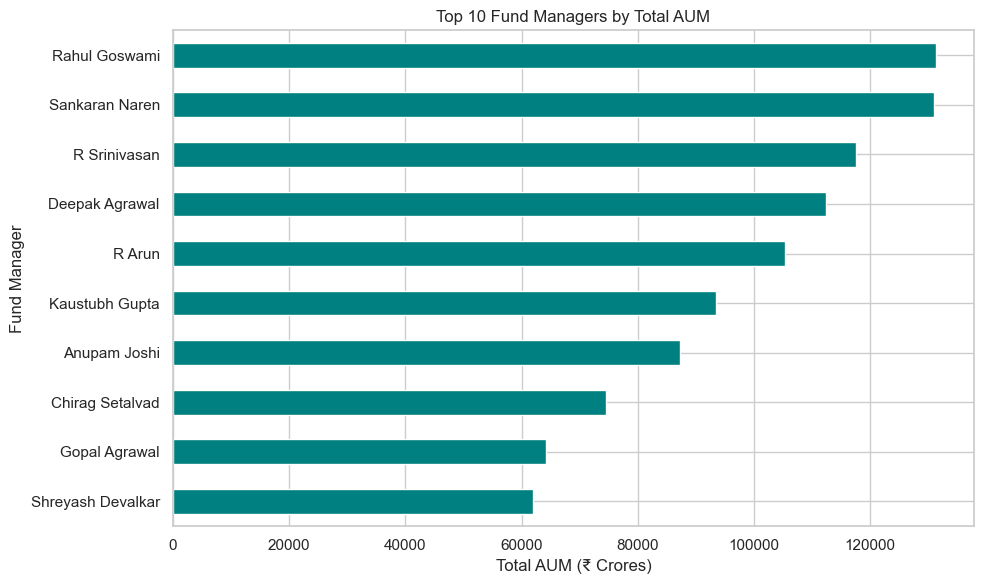

In [14]:
top_10_by_aum.plot(kind='barh', figsize=(10, 6), color='teal')
plt.title("Top 10 Fund Managers by Total AUM")
plt.xlabel("Total AUM (₹ Crores)")
plt.ylabel("Fund Manager")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [15]:
amc_by_manager = df.groupby('fund_manager')['amc_name'].unique().reset_index()
amc_by_manager.columns = ['fund_manager', 'amc_list']

amc_by_manager.describe()

,fund_manager,amc_list
count,260,260
unique,260,40
top,Abhinav Khandelwal,[UTI Mutual Fund]
freq,1,17


In [16]:
aum_by_manager = df.groupby('fund_manager')['fund_size_cr'].sum().reset_index()
aum_by_manager.columns = ['fund_manager', 'total_aum']
aum_by_manager.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fund_manager  260 non-null    object 
 1   total_aum     260 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.2+ KB


Merge both aum and amc df on fund_manager

In [17]:
manager_info = pd.merge(aum_by_manager,amc_by_manager, on ='fund_manager')
manager_info = manager_info.sort_values(by='total_aum', ascending=False)
manager_info.head(10)

,fund_manager,total_aum,amc_list
159,Rahul Goswami,131306.0,[ICICI Prudential Mutual Fund]
202,Sankaran Naren,131044.0,[ICICI Prudential Mutual Fund]
156,R Srinivasan,117499.0,[SBI Mutual Fund]
60,Deepak Agrawal,112477.0,[Kotak Mahindra Mutual Fund]
153,R Arun,105288.0,[SBI Mutual Fund]
102,Kaustubh Gupta,93460.0,[Aditya Birla Sun Life Mutual Fund]
38,Anupam Joshi,87273.0,[HDFC Mutual Fund]
58,Chirag Setalvad,74543.0,[HDFC Mutual Fund]
80,Gopal Agrawal,64166.0,[HDFC Mutual Fund]
212,Shreyash Devalkar,62046.0,[Axis Mutual Fund]


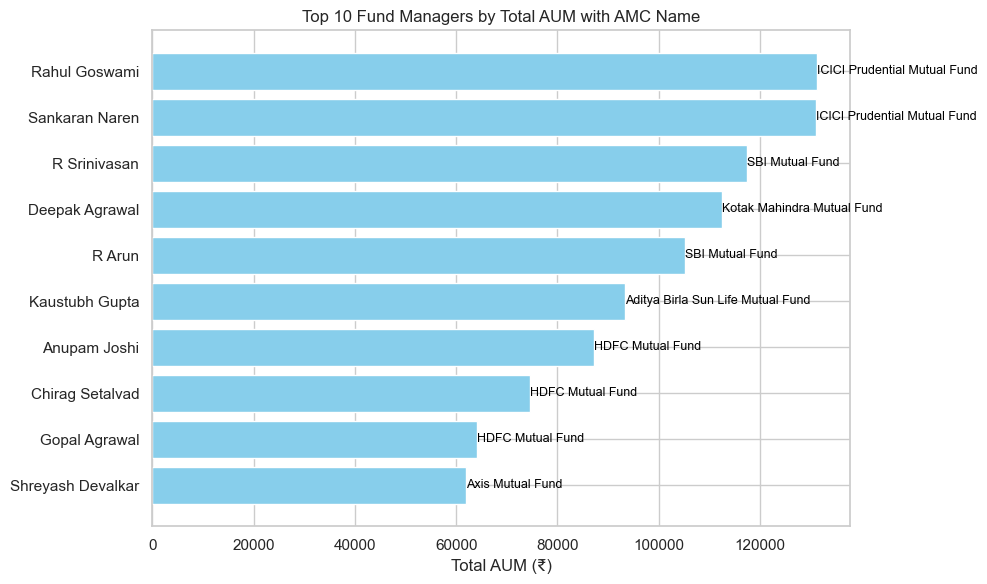

In [18]:
# Use first AMC from list
manager_info['amc_name'] = manager_info['amc_list'].apply(
    lambda x: x[0] if  len(x) > 0 else "Unknown"
)
#manager_info.head(10)
# Top 10 fund managers
top_10_simple = manager_info.sort_values(by='total_aum', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_simple['fund_manager'], top_10_simple['total_aum'], color='skyblue')

# Add AMC names as text labels
for i, (bar, amc) in enumerate(zip(bars, top_10_simple['amc_name'])):
    plt.text(bar.get_width() + 1, i, amc, va='center', fontsize=9, color='black')

plt.xlabel("Total AUM (₹)")
plt.title("Top 10 Fund Managers by Total AUM with AMC Name")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Adding the column super_category to the df

In [19]:
def categorize_fund(row):
        category = str(row['category']).strip().lower()
        sub_category = str(row['sub_category']).strip().lower()
        scheme_name = str(row['scheme_name']).strip().lower() # Using scheme_name for specific cases

        # Equity-based classifications
        if 'large cap' in sub_category or 'large cap' in category or 'largecap' in scheme_name:
            return 'Equity: Large Cap'
        elif 'mid cap' in sub_category or 'mid cap' in category or 'midcap' in scheme_name:
            return 'Equity: Mid Cap'
        elif 'small cap' in sub_category or 'small cap' in category or 'smallcap' in scheme_name:
            return 'Equity: Small Cap'
        elif 'flexi cap' in sub_category or 'multi cap' in sub_category or 'flexicap' in scheme_name or 'multicap' in scheme_name:
            return 'Equity: Multi/Flexi Cap'
        elif 'focused' in sub_category or 'focused' in category or 'focused' in scheme_name:
            return 'Equity: Focused' # Specific bucket for focused funds

        # Hybrid funds
        elif 'hybrid' in category or 'balanced' in sub_category or 'asset allocation' in sub_category:
            return 'Hybrid'

        # Debt funds
        elif 'debt' in category or 'bond' in sub_category or 'gilt' in sub_category or \
             'liquid' in sub_category or 'credit risk' in sub_category or \
             'duration' in sub_category or 'money market' in sub_category:
            return 'Debt'

        # Passive/Index/ETF funds
        elif 'index' in sub_category or 'index' in category or 'etf' in sub_category or 'etf' in category:
            return 'Passive: Index/ETF'

        # Solution-oriented funds (e.g., retirement, children's plans)
        elif 'solution' in category or 'retirement' in sub_category or 'children' in sub_category:
            return 'Solution Oriented'

        # Sectoral/Thematic funds
        elif 'sectoral' in category or 'thematic' in category or 'sector' in sub_category or 'thematic' in sub_category:
            return 'Equity: Sectoral/Thematic'

        # Other specific categories that might appear
        elif 'value' in sub_category or 'contra' in sub_category:
            return 'Equity: Value/Contra'
        elif 'dividend yield' in sub_category:
            return 'Equity: Dividend Yield'
        elif 'international' in sub_category or 'global' in sub_category:
            return 'Equity: International'

        # Fallback for anything not caught by the above rules
        return 'Other/Unclassified'

# Apply the categorization function to create a new 'broad_category' column
df['broad_category'] = df.apply(categorize_fund, axis=1)

### Different categories

In [20]:
df['broad_category'].value_counts()

broad_category
Debt                         281
Hybrid                       116
Other/Unclassified            91
Equity: Sectoral/Thematic     82
Equity: Mid Cap               49
Equity: Multi/Flexi Cap       30
Equity: Large Cap             28
Passive: Index/ETF            26
Equity: Small Cap             26
Equity: Focused               20
Solution Oriented             18
Equity: Value/Contra          16
Equity: Dividend Yield         6
Name: count, dtype: int64

### Flattening the categories (broad categories)

We did intermediate category column called "broad_category" and then flatten that column to "super_category" because to avoid unnecessary grouping, by including extra step helps categorize them properly, especially if the data you are categorizing is too verbal.

In [21]:
def get_super_category(broad_cat):
    if broad_cat.startswith('Equity'):
        return 'Equity'
    elif broad_cat == 'Debt':
        return 'Debt'
    elif broad_cat == 'Hybrid':
        return 'Hybrid'
    elif broad_cat.startswith('Passive'):
        return 'Passive'
    elif broad_cat == 'Solution Oriented':
        return 'Solution Oriented'
    else:
        return 'Other/Unclassified'

df['super_category'] = df['broad_category'].apply(get_super_category)


In [22]:
df['super_category'].value_counts()

super_category
Debt                  281
Equity                257
Hybrid                116
Other/Unclassified     91
Passive                26
Solution Oriented      18
Name: count, dtype: int64

# Goal:
## To define a parameter or column that can be used to judge the performance of any fund

### Steps:
### Scale  ->  wiegh  ->  define  -> judge

In [23]:
from sklearn.preprocessing import MinMaxScaler

# Metrics to include
metrics_cols = ['scheme_name', 'alpha', 'sharpe', 'sortino', 'returns_3yr', 'returns_5yr', 'sd']

# Filter necessary columns
performance_df = df[metrics_cols].copy()

# Drop rows with nulls in any metric
performance_df = performance_df.dropna()


In [24]:
# Initialize scaler
scaler = MinMaxScaler()

metrics_to_scale = ['alpha', 'sharpe', 'sortino', 'returns_3yr', 'returns_5yr', 'sd']

# Fit and transform
scaled_values = scaler.fit_transform(performance_df[metrics_to_scale])

# Create a new DataFrame with scaled values
scaled_df = pd.DataFrame(scaled_values, columns=[f"{col}_scaled" for col in metrics_to_scale])

# Combine with fund names
scaled_df['scheme_name'] = performance_df['scheme_name'].values

# Reorder columns
scaled_df = scaled_df[['scheme_name'] + [col for col in scaled_df.columns if col != 'scheme_name']]

In [25]:
scaled_df.head(10)

,scheme_name,alpha_scaled,sharpe_scaled,sortino_scaled,returns_3yr_scaled,returns_5yr_scaled,sd_scaled
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,0.384236,0.244240,0.145746,0.046990,0.402930,0.117753
1,Aditya Birla SL Arbitrage Fund,0.366749,0.442396,0.216179,0.022026,0.351648,0.005810
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,0.394828,0.516129,0.363319,0.229075,0.505495,0.133118
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,0.172167,0.396313,0.275453,0.202643,0.476190,0.190058
4,Aditya Birla SL Balanced Advantage Fund,0.378079,0.509217,0.380753,0.224670,0.505495,0.130536
5,Aditya Birla SL Banking&Financial Services-Dir...,0.359606,0.412442,0.267782,0.312775,0.487179,0.326146
6,Aditya Birla SL Banking&PSU Debt Fund,0.438916,0.440092,0.257322,0.051395,0.417582,0.021175
7,Aditya Birla SL CEF – Global Agri Plan-Direct ...,0.374384,0.433180,0.222455,0.383260,0.490842,0.257069
8,Aditya Birla SL Corporate Bond Fund,0.387685,0.500000,0.282427,0.055800,0.421245,0.021433
9,Aditya Birla SL Credit Risk Fund,0.403202,0.527650,0.250349,0.083700,0.413919,0.033957


In [26]:
# Calculate weighted score
scaled_df['score'] = (
    0.3 * scaled_df['sharpe_scaled'] +
    0.2 * scaled_df['sortino_scaled'] +
    0.2 * scaled_df['alpha_scaled'] +
    0.1 * scaled_df['returns_3yr_scaled'] +
    0.1 * scaled_df['returns_5yr_scaled'] -
    0.1 * scaled_df['sd_scaled']
)

# Sort by score
top_funds = scaled_df.sort_values(by='score', ascending=False)

# View top 10
top_funds[['scheme_name', 'score']].head(10)


,scheme_name,score
591,Quant Infrastructure Fund,0.641609
596,Quant Small Cap Fund,0.607554
597,Quant Tax Plan- Direct Growth,0.570135
593,Quant Liquid Plan – Direct Growth,0.557206
587,Quant Absolute Fund,0.547644
611,SBI Contra Fund,0.541386
595,Quant Multi Asset Fund,0.536234
589,Quant Flexi Cap Fund,0.533155
728,Templeton India Equity Income Fund,0.526643
139,Canara Robeco Small Cap Fund,0.518131


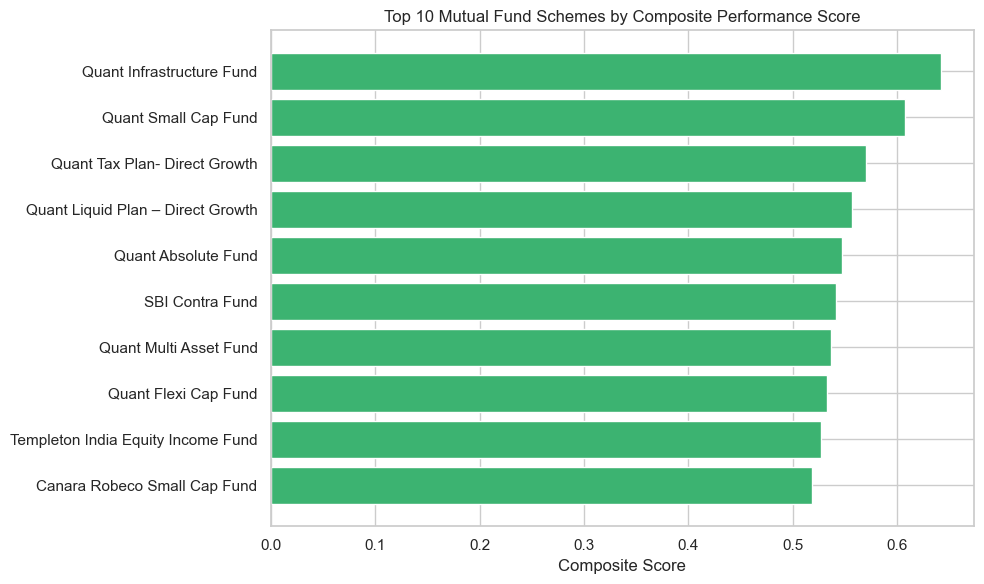

In [27]:

# Select top 10
top_10_plot = top_funds[['scheme_name', 'score']].head(10)

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_plot['scheme_name'], top_10_plot['score'], color='mediumseagreen')
plt.xlabel("Composite Score")
plt.title("Top 10 Mutual Fund Schemes by Composite Performance Score")
plt.gca().invert_yaxis()  # Highest score on top
plt.tight_layout()
plt.show()


## Plot Risk (sd) vs Composite score for all funds

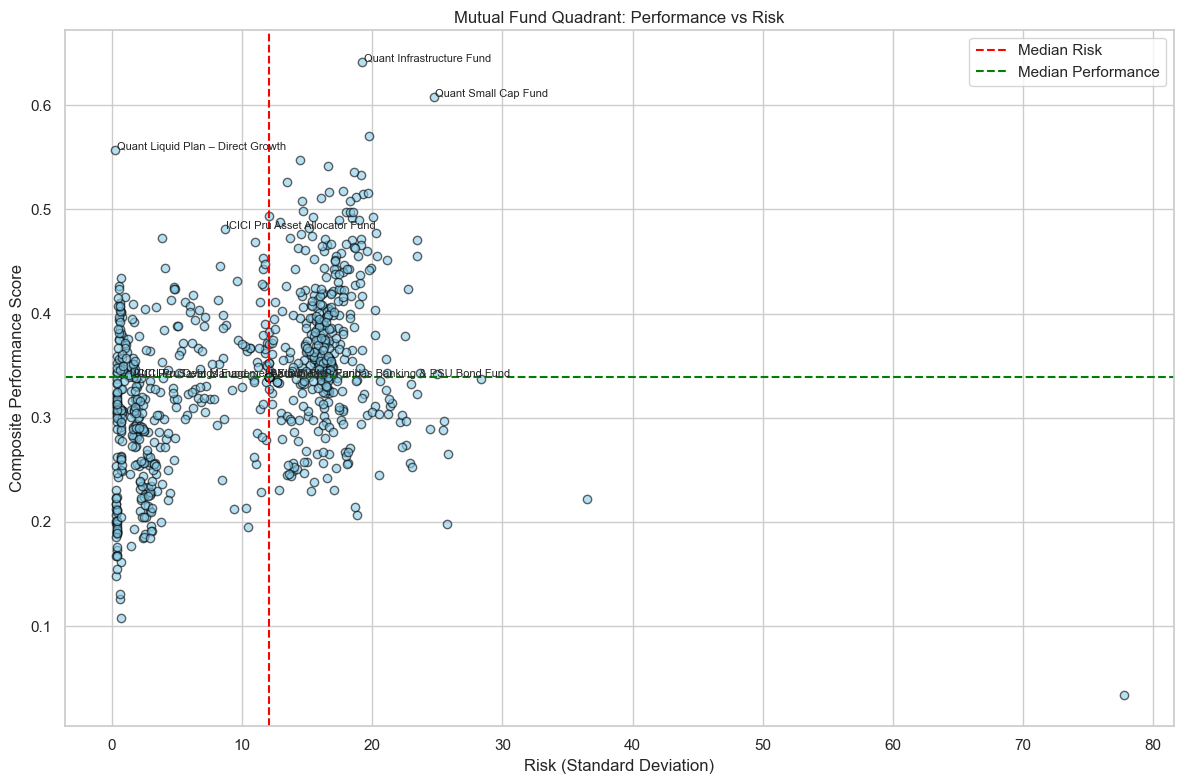

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Use raw SD (not scaled) and score
plot_df = scaled_df.copy()
plot_df['sd_raw'] = performance_df['sd'].values  # raw SD for axis

# Compute medians
score_median = plot_df['score'].median()
sd_median = plot_df['sd_raw'].median()

# Plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    plot_df['sd_raw'], 
    plot_df['score'], 
    alpha=0.6, 
    c='skyblue', 
    edgecolors='black'
)

# Axis labels and grid
plt.axvline(sd_median, color='red', linestyle='--', label='Median Risk')
plt.axhline(score_median, color='green', linestyle='--', label='Median Performance')
plt.xlabel("Risk (Standard Deviation)")
plt.ylabel("Composite Performance Score")
plt.title("Mutual Fund Quadrant: Performance vs Risk")
plt.grid(True)

# Annotate 2 funds per quadrant
quadrants = {
    'High Perf - Low Risk': plot_df[(plot_df['score'] > score_median) & (plot_df['sd_raw'] < sd_median)],
    'High Perf - High Risk': plot_df[(plot_df['score'] > score_median) & (plot_df['sd_raw'] >= sd_median)],
    'Low Perf - Low Risk': plot_df[(plot_df['score'] <= score_median) & (plot_df['sd_raw'] < sd_median)],
    'Low Perf - High Risk': plot_df[(plot_df['score'] <= score_median) & (plot_df['sd_raw'] >= sd_median)]
}

for label, group in quadrants.items():
    for i, row in group.nlargest(2, 'score').iterrows():  # pick top 2 from each
        plt.text(row['sd_raw'] + 0.1, row['score'], row['scheme_name'], fontsize=8)

plt.legend()
plt.tight_layout()
plt.show()


In [29]:

# Merge raw SD directly into scaled_df from performance_df using scheme_name
scaled_df = scaled_df.merge(
    performance_df[['scheme_name', 'sd']],
    on='scheme_name',
    how='left'
)

# Rename if needed
scaled_df.rename(columns={'sd': 'sd_raw'}, inplace=True)



In [30]:
category_map = df.set_index('scheme_name')['super_category']
scaled_df['super_category'] = scaled_df['scheme_name'].map(category_map)

In [31]:
scaled_df.columns

Index(['scheme_name', 'alpha_scaled', 'sharpe_scaled', 'sortino_scaled',
       'returns_3yr_scaled', 'returns_5yr_scaled', 'sd_scaled', 'score',
       'sd_raw', 'super_category'],
      dtype='object')

In [32]:
# Filter top 20 schemes by score within each fund category
top_schemes_by_category = (
    scaled_df
    .sort_values(by='score', ascending=False)
    .groupby('super_category')
    .head(20)
)


## Plot top 20 in each category

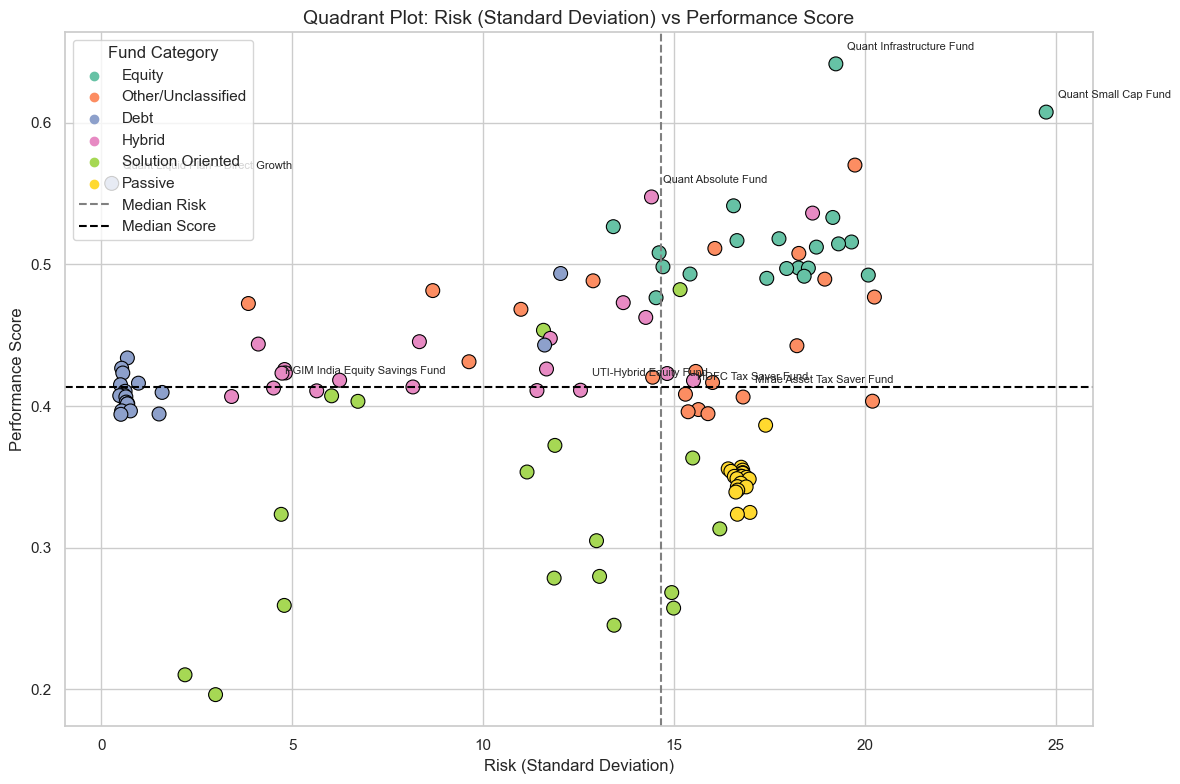

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
plt.figure(figsize=(12, 8))
sns.set(style='whitegrid')

# Scatter plot: Risk vs Performance
sns.scatterplot(
    data=top_schemes_by_category,
    x='sd_raw',        # x-axis: raw standard deviation (risk)
    y='score',         # y-axis: performance score
    hue='super_category',
    palette='Set2',
    s=100,
    edgecolor='black'
)

# Add median lines to create quadrants
plt.axvline(top_schemes_by_category['sd_raw'].median(), color='gray', linestyle='--', label='Median Risk')
plt.axhline(top_schemes_by_category['score'].median(), color='black', linestyle='--', label='Median Score')

# Label 2 funds from each quadrant
quadrants = {
    'High Perf - Low Risk': top_schemes_by_category[(top_schemes_by_category['score'] > top_schemes_by_category['score'].median()) &
                                                     (top_schemes_by_category['sd_raw'] < top_schemes_by_category['sd_raw'].median())],
    'High Perf - High Risk': top_schemes_by_category[(top_schemes_by_category['score'] > top_schemes_by_category['score'].median()) &
                                                      (top_schemes_by_category['sd_raw'] >= top_schemes_by_category['sd_raw'].median())],
    'Low Perf - Low Risk': top_schemes_by_category[(top_schemes_by_category['score'] <= top_schemes_by_category['score'].median()) &
                                                    (top_schemes_by_category['sd_raw'] < top_schemes_by_category['sd_raw'].median())],
    'Low Perf - High Risk': top_schemes_by_category[(top_schemes_by_category['score'] <= top_schemes_by_category['score'].median()) &
                                                     (top_schemes_by_category['sd_raw'] >= top_schemes_by_category['sd_raw'].median())]
}

# Add text labels with offset to avoid overlap
for quadrant, df_quad in quadrants.items():
    for i, row in df_quad.nlargest(2, 'score').iterrows():
        plt.text(row['sd_raw'] + 0.3, row['score'] + 0.01, row['scheme_name'], fontsize=8)

        
# Labels and title
plt.title("Quadrant Plot: Risk (Standard Deviation) vs Performance Score", fontsize=14)
plt.xlabel("Risk (Standard Deviation)")
plt.ylabel("Performance Score")
plt.legend(title='Fund Category', loc='upper left')
plt.tight_layout()
plt.show()


### Note:
#### In below scatter plot of all the funds performance vs risk, you can observe the seperation of categories better than we did in pervious Notebook, a sign that the categorizing worked better this time

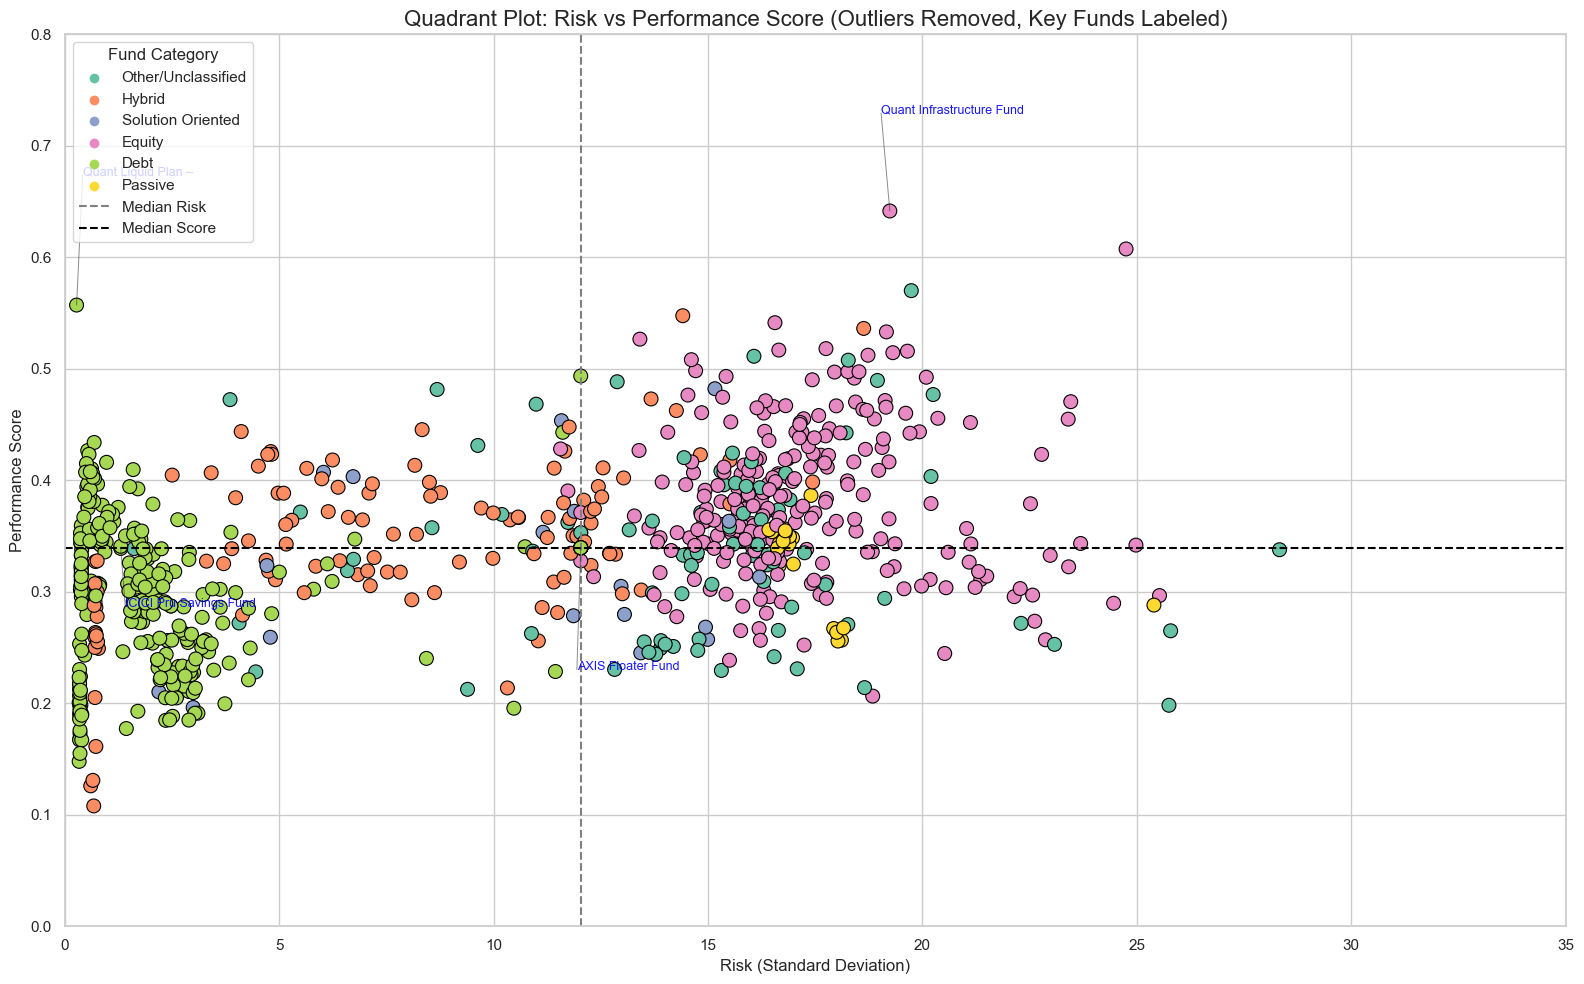

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# For reproducibility
np.random.seed(42)

# Label shortener
def clean_label(name, max_words=4):
    return ' '.join(name.split()[:max_words])

# Filter to remove outliers with very high standard deviation
filtered_df = scaled_df[scaled_df['sd_raw'] < 40]

# Plot setup
plt.figure(figsize=(16, 10))
sns.set(style='whitegrid')

# Scatter plot
sns.scatterplot(
    data=filtered_df,
    x='sd_raw',
    y='score',
    hue='super_category',
    palette='Set2',
    s=100,
    edgecolor='black'
)

# Medians for quadrant split
score_median = filtered_df['score'].median()
sd_median = filtered_df['sd_raw'].median()

# Draw quadrant median lines
plt.axvline(sd_median, color='gray', linestyle='--', label='Median Risk')
plt.axhline(score_median, color='black', linestyle='--', label='Median Score')

# Define quadrants
quadrants = {
    'High Return - Low Risk': filtered_df[
        (filtered_df['score'] > score_median) & 
        (filtered_df['sd_raw'] < sd_median)
    ],
    'High Return - High Risk': filtered_df[
        (filtered_df['score'] > score_median) & 
        (filtered_df['sd_raw'] >= sd_median)
    ],
    'Low Return - Low Risk': filtered_df[
        (filtered_df['score'] <= score_median) & 
        (filtered_df['sd_raw'] < sd_median)
    ],
    'Low Return - High Risk': filtered_df[
        (filtered_df['score'] <= score_median) & 
        (filtered_df['sd_raw'] >= sd_median)
    ]
}

# Label only top 1 scheme from each quadrant
for label, group in quadrants.items():
    top_scheme = group.nlargest(1, 'score')
    for _, row in top_scheme.iterrows():
        short_name = clean_label(row['scheme_name'])

        # Random offset
        rand_x = np.random.uniform(0.08, 0.25)
        rand_y = np.random.uniform(0.04, 0.12)

        # Direction based on quadrant
        x_offset = rand_x if row['sd_raw'] < sd_median else -rand_x
        y_offset = rand_y if row['score'] > score_median else -rand_y

        x_text = row['sd_raw'] + x_offset
        y_text = row['score'] + y_offset

        # Leader line
        plt.plot([row['sd_raw'], x_text], [row['score'], y_text], 'k-', lw=0.7, alpha=0.5)
        plt.text(x_text, y_text, short_name, fontsize=9, color='blue', alpha=0.9)

# Zoom in to main area
plt.xlim(0, 35)
plt.ylim(0, 0.8)

# Final touches
plt.title("Quadrant Plot: Risk vs Performance Score (Outliers Removed, Key Funds Labeled)", fontsize=16)
plt.xlabel("Risk (Standard Deviation)")
plt.ylabel("Performance Score")
plt.legend(title='Fund Category', loc='upper left')
plt.tight_layout()
plt.show()


## Looking at only 'Equity', 'Debt', 'Hybrid'

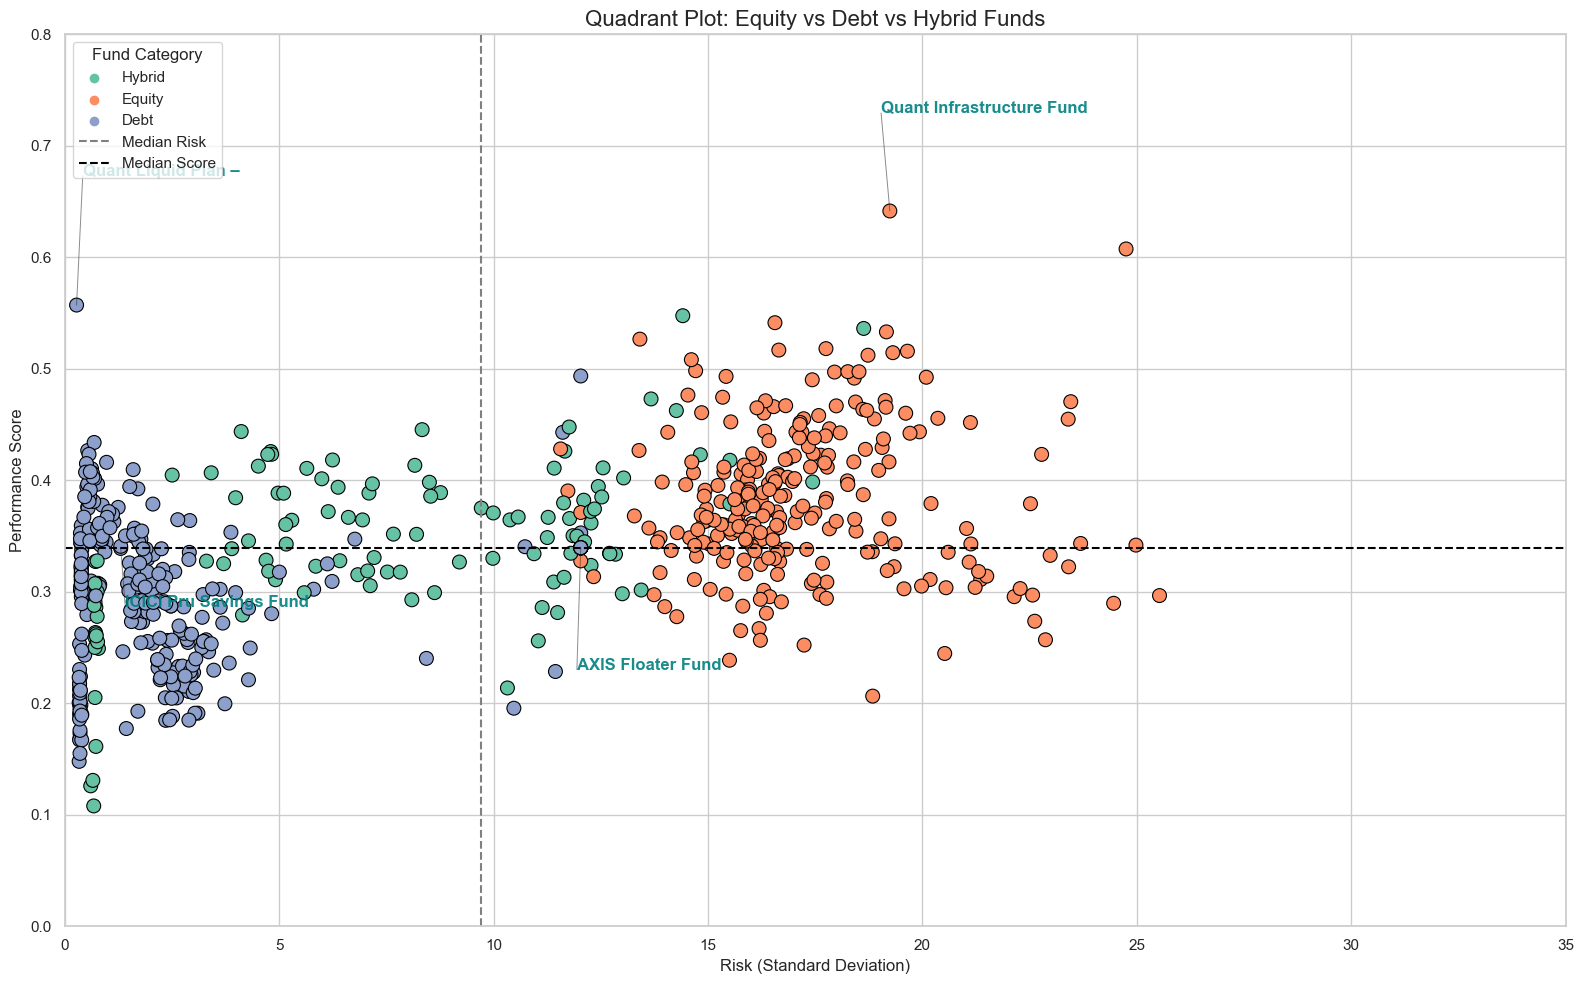

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Reproducibility
np.random.seed(42)

# Label shortener
def clean_label(name, max_words=4):
    return ' '.join(name.split()[:max_words])

# Step 1: Filter by standard deviation and super_category
core_categories = ['Equity', 'Debt', 'Hybrid']
filtered_df = scaled_df[
    (scaled_df['sd_raw'] < 40) & 
    (scaled_df['super_category'].isin(core_categories))
]

# Step 2: Set up plot
plt.figure(figsize=(16, 10))
sns.set(style='whitegrid')

# Step 3: Scatter plot
sns.scatterplot(
    data=filtered_df,
    x='sd_raw',
    y='score',
    hue='super_category',
    palette='Set2',
    s=100,
    edgecolor='black'
)

# Step 4: Add median lines
score_median = filtered_df['score'].median()
sd_median = filtered_df['sd_raw'].median()
plt.axvline(sd_median, color='gray', linestyle='--', label='Median Risk')
plt.axhline(score_median, color='black', linestyle='--', label='Median Score')

# Step 5: Define quadrants
quadrants = {
    'High Return - Low Risk': filtered_df[
        (filtered_df['score'] > score_median) & 
        (filtered_df['sd_raw'] < sd_median)
    ],
    'High Return - High Risk': filtered_df[
        (filtered_df['score'] > score_median) & 
        (filtered_df['sd_raw'] >= sd_median)
    ],
    'Low Return - Low Risk': filtered_df[
        (filtered_df['score'] <= score_median) & 
        (filtered_df['sd_raw'] < sd_median)
    ],
    'Low Return - High Risk': filtered_df[
        (filtered_df['score'] <= score_median) & 
        (filtered_df['sd_raw'] >= sd_median)
    ]
}

# Step 6: Label top scheme per quadrant
for label, group in quadrants.items():
    top_scheme = group.nlargest(1, 'score')
    for _, row in top_scheme.iterrows():
        short_name = clean_label(row['scheme_name'])

        rand_x = np.random.uniform(0.08, 0.25)
        rand_y = np.random.uniform(0.04, 0.12)

        x_offset = rand_x if row['sd_raw'] < sd_median else -rand_x
        y_offset = rand_y if row['score'] > score_median else -rand_y

        x_text = row['sd_raw'] + x_offset
        y_text = row['score'] + y_offset

        plt.plot([row['sd_raw'], x_text], [row['score'], y_text], 'k-', lw=0.7, alpha=0.5)
        plt.text(x_text, y_text, short_name, fontsize=12, color='teal', weight='bold', alpha=0.9)
# Step 7: Final touches
plt.title("Quadrant Plot: Equity vs Debt vs Hybrid Funds", fontsize=16)
plt.xlabel("Risk (Standard Deviation)")
plt.ylabel("Performance Score")
plt.legend(title='Fund Category', loc='upper left')
plt.xlim(0, 35)
plt.ylim(0, 0.8)
plt.tight_layout()
plt.show()


## color the backgound showcasing the range in which the below funds fall

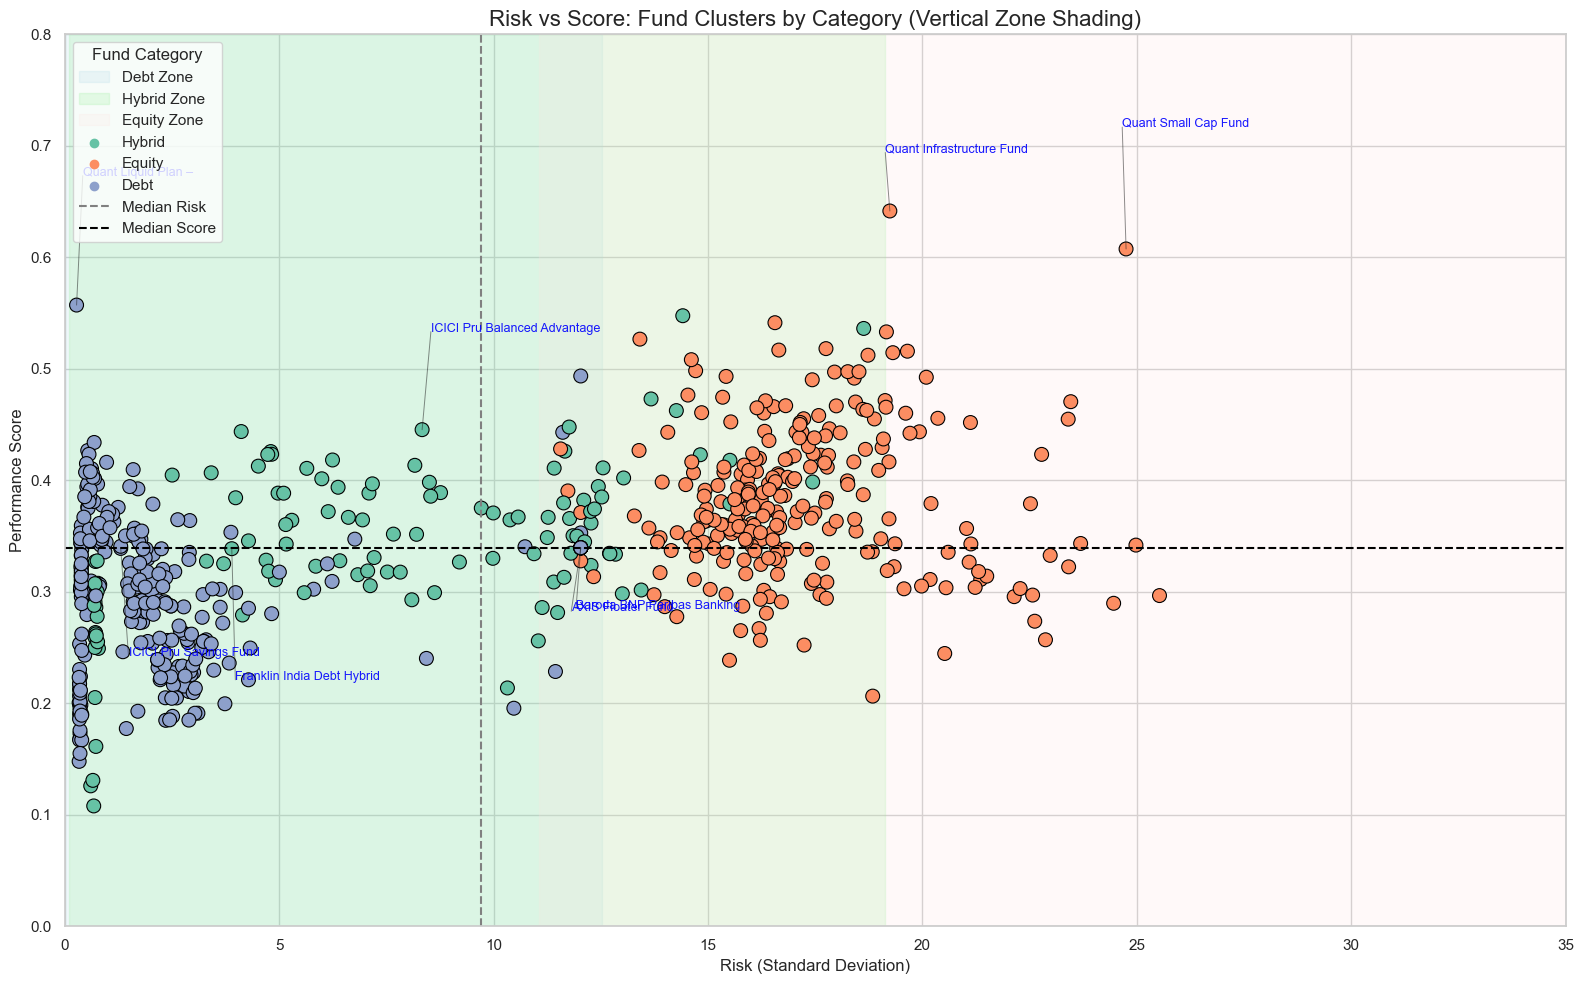

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Reproducibility
np.random.seed(42)

def clean_label(name, max_words=4):
    return ' '.join(name.split()[:max_words])

# Step 1: Filter core categories and outliers
core_categories = ['Equity', 'Debt', 'Hybrid']
filtered_df = scaled_df[
    (scaled_df['sd_raw'] < 40) & 
    (scaled_df['super_category'].isin(core_categories))
]

# Step 2: Medians
score_median = filtered_df['score'].median()
sd_median = filtered_df['sd_raw'].median()

# Step 3: Set up plot
plt.figure(figsize=(16, 10))
sns.set(style='whitegrid')

# Step 4: Estimate boundaries (based on actual spread)
debt_max = filtered_df[filtered_df['super_category'] == 'Debt']['sd_raw'].max()
hybrid_max = filtered_df[filtered_df['super_category'] == 'Hybrid']['sd_raw'].max()
hybrid_min = filtered_df[filtered_df['super_category'] == 'Hybrid']['sd_raw'].min()
equity_min = filtered_df[filtered_df['super_category'] == 'Equity']['sd_raw'].min()

# Add vertical bands (Debt, Hybrid, Equity zones)
plt.axvspan(0, debt_max + 0.5, color='lightblue', alpha=0.2, label='Debt Zone')
plt.axvspan(hybrid_min - 0.5, hybrid_max + 0.5, color='lightgreen', alpha=0.2, label='Hybrid Zone')
plt.axvspan(equity_min - 0.5, 35, color='mistyrose', alpha=0.2, label='Equity Zone')

# Step 5: Scatter plot
sns.scatterplot(
    data=filtered_df,
    x='sd_raw',
    y='score',
    hue='super_category',
    palette='Set2',
    s=100,
    edgecolor='black'
)

# Step 6: Median lines
plt.axvline(sd_median, color='gray', linestyle='--', label='Median Risk')
plt.axhline(score_median, color='black', linestyle='--', label='Median Score')

# Step 7: Define quadrants and label top 2 in each
quadrants = {
    'High Return - Low Risk': filtered_df[
        (filtered_df['score'] > score_median) & 
        (filtered_df['sd_raw'] < sd_median)
    ],
    'High Return - High Risk': filtered_df[
        (filtered_df['score'] > score_median) & 
        (filtered_df['sd_raw'] >= sd_median)
    ],
    'Low Return - Low Risk': filtered_df[
        (filtered_df['score'] <= score_median) & 
        (filtered_df['sd_raw'] < sd_median)
    ],
    'Low Return - High Risk': filtered_df[
        (filtered_df['score'] <= score_median) & 
        (filtered_df['sd_raw'] >= sd_median)
    ]
}

for label, group in quadrants.items():
    top_schemes = group.nlargest(2, 'score')
    for _, row in top_schemes.iterrows():
        short_name = clean_label(row['scheme_name'])

        rand_x = np.random.uniform(0.08, 0.25)
        rand_y = np.random.uniform(0.04, 0.12)

        x_offset = rand_x if row['sd_raw'] < sd_median else -rand_x
        y_offset = rand_y if row['score'] > score_median else -rand_y

        x_text = row['sd_raw'] + x_offset
        y_text = row['score'] + y_offset

        plt.plot([row['sd_raw'], x_text], [row['score'], y_text], 'k-', lw=0.7, alpha=0.5)
        plt.text(x_text, y_text, short_name, fontsize=9, color='blue', alpha=0.9)

# Step 8: Final touches
plt.title("Risk vs Score: Fund Clusters by Category (Vertical Zone Shading)", fontsize=16)
plt.xlabel("Risk (Standard Deviation)")
plt.ylabel("Performance Score")
plt.xlim(0, 35)
plt.ylim(0, 0.8)
plt.legend(title='Fund Category', loc='upper left')
plt.tight_layout()
plt.show()


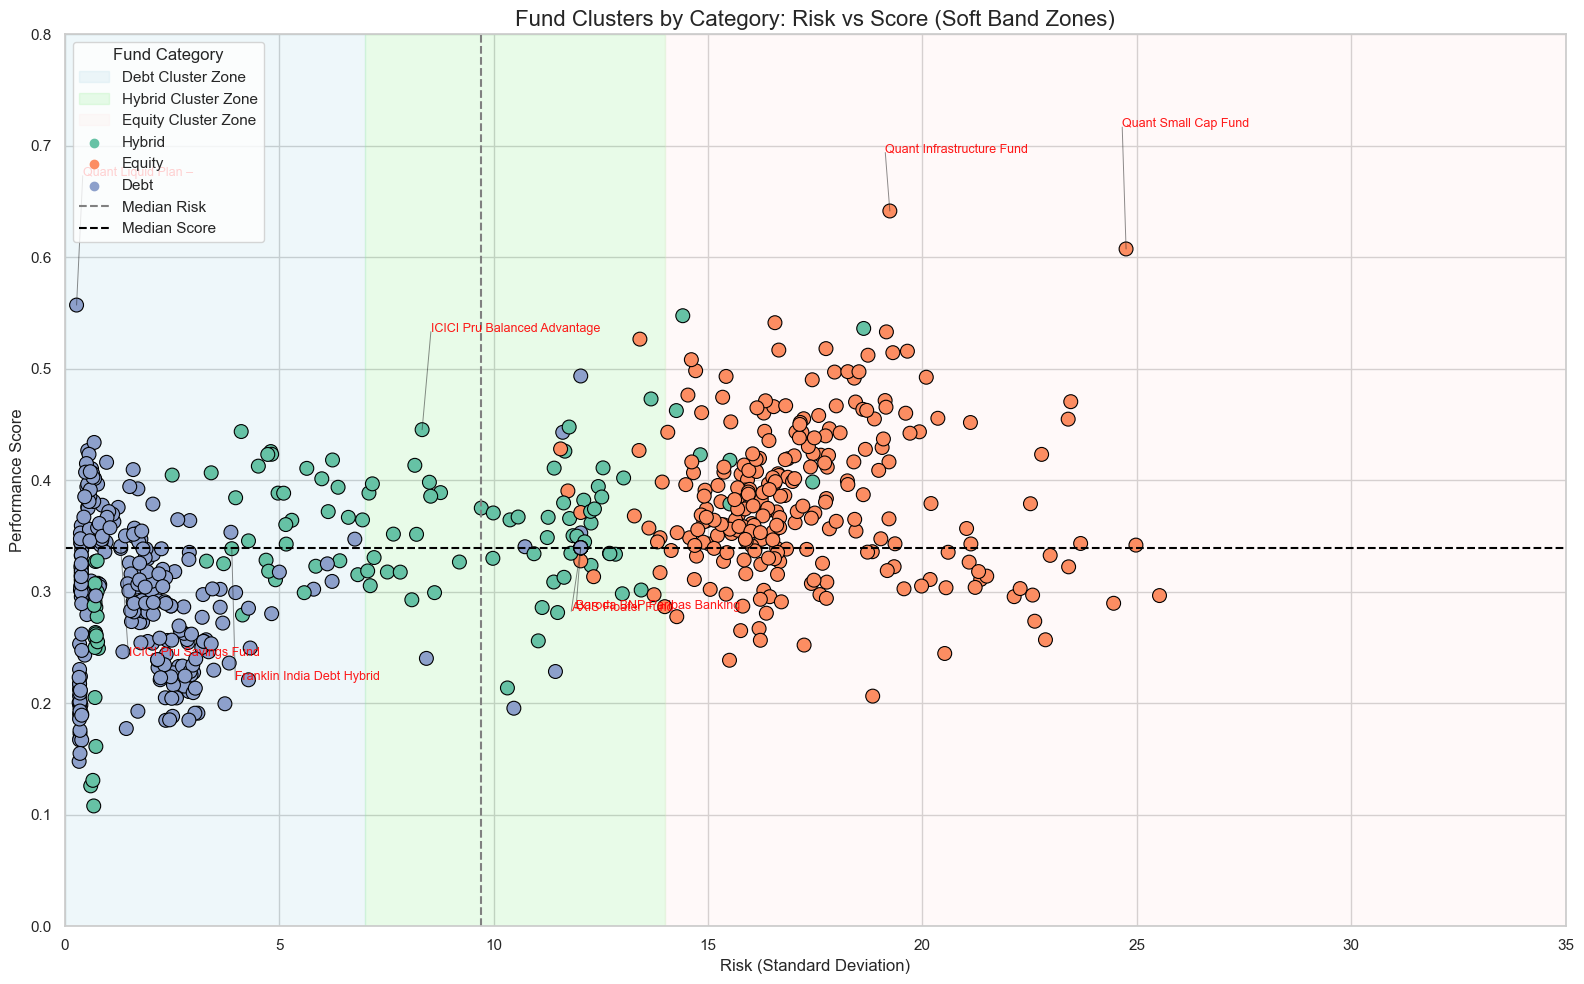

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Reproducibility
np.random.seed(42)

def clean_label(name, max_words=4):
    return ' '.join(name.split()[:max_words])

# Filter for core categories
core_categories = ['Equity', 'Debt', 'Hybrid']
filtered_df = scaled_df[
    (scaled_df['sd_raw'] < 40) & 
    (scaled_df['super_category'].isin(core_categories))
]

# Medians
score_median = filtered_df['score'].median()
sd_median = filtered_df['sd_raw'].median()

# Setup
plt.figure(figsize=(16, 10))
sns.set(style='whitegrid')

# Manually define cluster cutoffs
x1 = 7   # End of Debt-dominated region
x2 = 14   # End of Hybrid-dominated region, Equity starts after this

# Soft vertical bands (non-intrusive)
plt.axvspan(0, x1, color='lightblue', alpha=0.2, label='Debt Cluster Zone')
plt.axvspan(x1, x2, color='lightgreen', alpha=0.2, label='Hybrid Cluster Zone')
plt.axvspan(x2, 35, color='mistyrose', alpha=0.2, label='Equity Cluster Zone')

# Scatter plot
sns.scatterplot(
    data=filtered_df,
    x='sd_raw',
    y='score',
    hue='super_category',
    palette='Set2',
    s=100,
    edgecolor='black'
)

# Medians
plt.axvline(sd_median, color='gray', linestyle='--', label='Median Risk')
plt.axhline(score_median, color='black', linestyle='--', label='Median Score')

# Quadrants and top 2 labeling
quadrants = {
    'High Return - Low Risk': filtered_df[
        (filtered_df['score'] > score_median) & 
        (filtered_df['sd_raw'] < sd_median)
    ],
    'High Return - High Risk': filtered_df[
        (filtered_df['score'] > score_median) & 
        (filtered_df['sd_raw'] >= sd_median)
    ],
    'Low Return - Low Risk': filtered_df[
        (filtered_df['score'] <= score_median) & 
        (filtered_df['sd_raw'] < sd_median)
    ],
    'Low Return - High Risk': filtered_df[
        (filtered_df['score'] <= score_median) & 
        (filtered_df['sd_raw'] >= sd_median)
    ]
}

for label, group in quadrants.items():
    top_schemes = group.nlargest(2, 'score')
    for _, row in top_schemes.iterrows():
        short_name = clean_label(row['scheme_name'])

        rand_x = np.random.uniform(0.08, 0.25)
        rand_y = np.random.uniform(0.04, 0.12)

        x_offset = rand_x if row['sd_raw'] < sd_median else -rand_x
        y_offset = rand_y if row['score'] > score_median else -rand_y

        x_text = row['sd_raw'] + x_offset
        y_text = row['score'] + y_offset

        plt.plot([row['sd_raw'], x_text], [row['score'], y_text], 'k-', lw=0.7, alpha=0.5)
        plt.text(x_text, y_text, short_name, fontsize=9, color='red', alpha=0.9)

# Final touches
plt.title("Fund Clusters by Category: Risk vs Score (Soft Band Zones)", fontsize=16)
plt.xlabel("Risk (Standard Deviation)")
plt.ylabel("Performance Score")
plt.xlim(0, 35)
plt.ylim(0, 0.8)
plt.legend(title='Fund Category', loc='upper left')
plt.tight_layout()
plt.show()


#### Get Top 4 funds to invest wit medium risk and good returns

In [38]:
# Calculate thresholds
score_threshold = scaled_df['score'].quantile(0.85)     # top 15% performers
sd_upper_limit = scaled_df['sd_raw'].quantile(0.90)      # not highest risk
sd_lower_limit = scaled_df['sd_raw'].quantile(0.65)      # but not low risk either

# Filter medium-to-high risk but strong performance
filtered_candidates = scaled_df[
    (scaled_df['score'] >= score_threshold) &
    (scaled_df['sd_raw'] >= sd_lower_limit) &
    (scaled_df['sd_raw'] <= sd_upper_limit)
]

# Sort by score and pick top 4
top_4_funds = filtered_candidates.sort_values(by='score', ascending=False).head(4)

# Show final selection
top_4_funds[['scheme_name', 'super_category', 'score', 'sd_raw']]


,scheme_name,super_category,score,sd_raw
611,SBI Contra Fund,Equity,0.541386,16.56
139,Canara Robeco Small Cap Fund,Equity,0.518131,17.75
441,Kotak Infrastructure & Ecoc. Reform-SP-DirGrowth,Equity,0.516829,16.65
646,SBI Tax Advantage Fund,Other/Unclassified,0.511286,16.07


## Goal:
## Recommend the top N mutual funds based on user preferences:

#### > using "sd_raw" in "scaled_df" as proxy for risk level

Recommend the top 3–5 mutual funds based on user preferences:

🔸 Inputs from the user:
Risk tolerance – Low / Medium / High

Investment horizon – Short (≤3 years), Medium (~5 years), Long (>5 years)

We will map this to:

sd_raw (Standard Deviation as a proxy for risk)

returns_3yr or returns_5yr depending on horizon

score (our composite score)

In [39]:
# Define risk bands based on sd_raw (you can tune these)
def classify_risk(sd):
    if sd <= 10:
        return "Low"
    elif sd <= 15:
        return "Medium"
    else:
        return "High"

# Add a 'risk_band' column
scaled_df['risk_band'] = scaled_df['sd_raw'].apply(classify_risk)


In [40]:
scaled_df.head()

,scheme_name,alpha_scaled,sharpe_scaled,sortino_scaled,returns_3yr_scaled,returns_5yr_scaled,sd_scaled,score,sd_raw,super_category,risk_band
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,0.384236,0.244240,0.145746,0.046990,0.402930,0.117753,0.212485,9.39,Other/Unclassified,Low
1,Aditya Birla SL Arbitrage Fund,0.366749,0.442396,0.216179,0.022026,0.351648,0.005810,0.286091,0.72,Hybrid,Low
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,0.394828,0.516129,0.363319,0.229075,0.505495,0.133118,0.366613,10.58,Other/Unclassified,Medium
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,0.172167,0.396313,0.275453,0.202643,0.476190,0.190058,0.257296,14.99,Solution Oriented,Medium
4,Aditya Birla SL Balanced Advantage Fund,0.378079,0.509217,0.380753,0.224670,0.505495,0.130536,0.364494,10.38,Hybrid,Medium


In [41]:
scaled_df['risk_band'].value_counts()

risk_band
Low       347
High      302
Medium    140
Name: count, dtype: int64

In [42]:
def recommend_funds(risk_tolerance, investment_horizon, top_n=5):
    # Filter by risk
    filtered = scaled_df[scaled_df['risk_band'].str.lower() == risk_tolerance.lower()]

    # Select return column based on horizon
    if investment_horizon.lower() == 'short':
        filtered = filtered.dropna(subset=['returns_3yr_scaled'])
        filtered['relevant_return'] = filtered['returns_3yr_scaled']
    elif investment_horizon.lower() == 'medium':
        filtered = filtered.dropna(subset=['returns_5yr_scaled'])
        filtered['relevant_return'] = filtered['returns_5yr_scaled']
    else:
        # For long-term, average both if available
        filtered = filtered.dropna(subset=['returns_3yr_scaled', 'returns_5yr_scaled'])
        filtered['relevant_return'] = (filtered['returns_3yr_scaled'] + filtered['returns_5yr_scaled']) / 2

    # Final score (weight can be adjusted)
    filtered['final_score'] = 0.6 * filtered['score'] + 0.4 * filtered['relevant_return']

    # Sort and select top
    top_recommendations = filtered.sort_values(by='final_score', ascending=False).head(top_n)

    return top_recommendations[['scheme_name', 'super_category', 'sd_raw', 'score', 'final_score']]


In [43]:
recommend_funds(risk_tolerance='medium', investment_horizon='medium', top_n=5)


,scheme_name,super_category,sd_raw,score,final_score
587,Quant Absolute Fund,Hybrid,14.41,0.547644,0.668513
77,AXIS Small Cap Fund,Equity,14.71,0.498306,0.643306
566,Parag Parikh Flexi Cap Fund,Equity,14.53,0.476462,0.603826
728,Templeton India Equity Income Fund,Equity,13.41,0.526643,0.588513
341,ICICI Pru Value Discovery Fund,Equity,14.61,0.508209,0.583314


# Conclusion for EDA

## 📌 Conclusion

The EDA performed on Indian mutual funds reveals several key insights:

- ✅ **Fund Category Distribution**: Equity mutual funds dominate the dataset, with sub-categories like large-cap, mid-cap, and small-cap offering varied risk-return profiles. Hybrid and debt funds follow in volume.

- 📈 **Performance Across Timeframes**:
  - Large-cap funds tend to offer more stable but moderate returns.
  - Mid-cap and small-cap funds show higher variance, with some delivering exceptional multi-year returns.
  - Debt and hybrid funds exhibit lower volatility but also lower long-term growth.

- 📊 **AUM and Returns**:
  - Higher AUM is not always correlated with better performance.
  - Many small-to-mid AUM funds outperform their larger peers, especially in small-cap categories.

- 🔍 **Risk vs Return**:
  - Small-cap funds show wider spread in returns, often reflecting higher risk and reward.
  - Equity funds show strong clustering, while debt funds stay low on both axes.
  - Consistent performers stand out within each cap segment, offering candidates for further investment analysis.

- 📉 **Outliers and Underperformers**:
  - The analysis helped flag a few funds with consistently poor performance or extremely low AUM, suggesting caution for investors.

---

### ✅ Final Thoughts

Accurate classification of fund types and cap segments was **crucial** for this analysis. Once fixed, the EDA provided clear patterns and practical investment insights. This study can serve as a base for more advanced analytics such as portfolio optimization or recommendation systems.



## Exploring data classification

In future will be extended well beyond just clustering and classification.

Can develop a ML Model which can analyse the Mutual fund real time and can suggest which are performing better.

Fund Manager can used the data we will be feeding


## K-Means Clustering

C:\Users\saiak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\saiak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


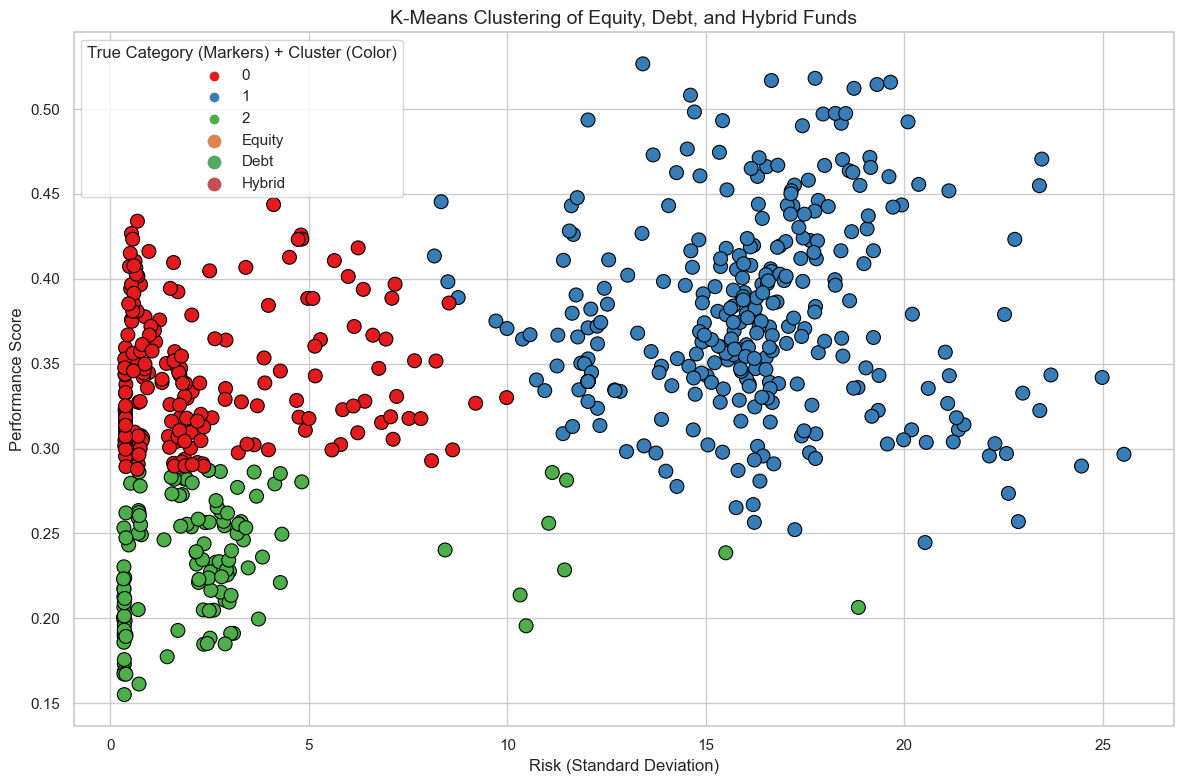

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Step 1: Filter Equity, Debt, Hybrid
core_funds_df = scaled_df[scaled_df['super_category'].isin(['Equity', 'Debt', 'Hybrid'])].copy()

# Step 2: Remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]

core_funds_df = remove_outliers_iqr(core_funds_df, 'sd_raw')
core_funds_df = remove_outliers_iqr(core_funds_df, 'score')


# Step 2: Select features
features = ['score', 'sd_raw']
X = core_funds_df[features]

# Step 3: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
core_funds_df['cluster'] = kmeans.fit_predict(X_scaled)

# Step 5: Plot
plt.figure(figsize=(12, 8))
sns.set(style='whitegrid')

sns.scatterplot(
    data=core_funds_df,
    x='sd_raw',
    y='score',
    hue='cluster',
    palette='Set1',
    s=100,
    edgecolor='black'
)

# Overlay markers for actual categories
for cat in ['Equity', 'Debt', 'Hybrid']:
    plt.scatter([], [], label=cat, s=80)

plt.title("K-Means Clustering of Equity, Debt, and Hybrid Funds", fontsize=14)
plt.xlabel("Risk (Standard Deviation)")
plt.ylabel("Performance Score")
plt.legend(title='True Category (Markers) + Cluster (Color)')
plt.tight_layout()
plt.show()


C:\Users\saiak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\saiak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


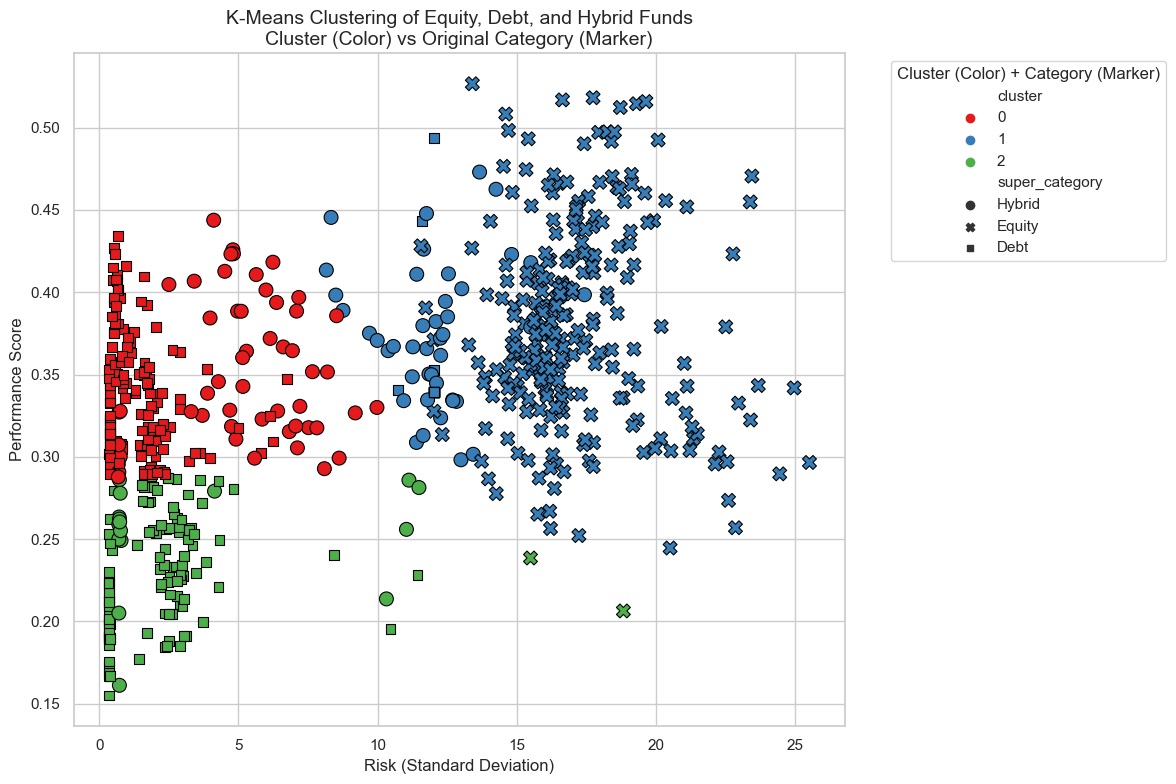

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Filter Equity, Debt, Hybrid only
core_funds_df = scaled_df[scaled_df['super_category'].isin(['Equity', 'Debt', 'Hybrid'])].copy()

# Step 2: Remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]

core_funds_df = remove_outliers_iqr(core_funds_df, 'sd_raw')
core_funds_df = remove_outliers_iqr(core_funds_df, 'score')


# Select features
features = ['score', 'sd_raw']
X = core_funds_df[features]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
core_funds_df['cluster'] = kmeans.fit_predict(X_scaled)

# Setup plot
plt.figure(figsize=(12, 8))
sns.set(style='whitegrid')

# Plot both cluster (color) and fund category (marker)
sns.scatterplot(
    data=core_funds_df,
    x='sd_raw',
    y='score',
    hue='cluster',
    style='super_category',  # Shape shows original category
    palette='Set1',
    s=100,
    edgecolor='black'
)

# Title and labels
plt.title("K-Means Clustering of Equity, Debt, and Hybrid Funds\nCluster (Color) vs Original Category (Marker)", fontsize=14)
plt.xlabel("Risk (Standard Deviation)")
plt.ylabel("Performance Score")
plt.legend(title='Cluster (Color) + Category (Marker)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


C:\Users\saiak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\saiak\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


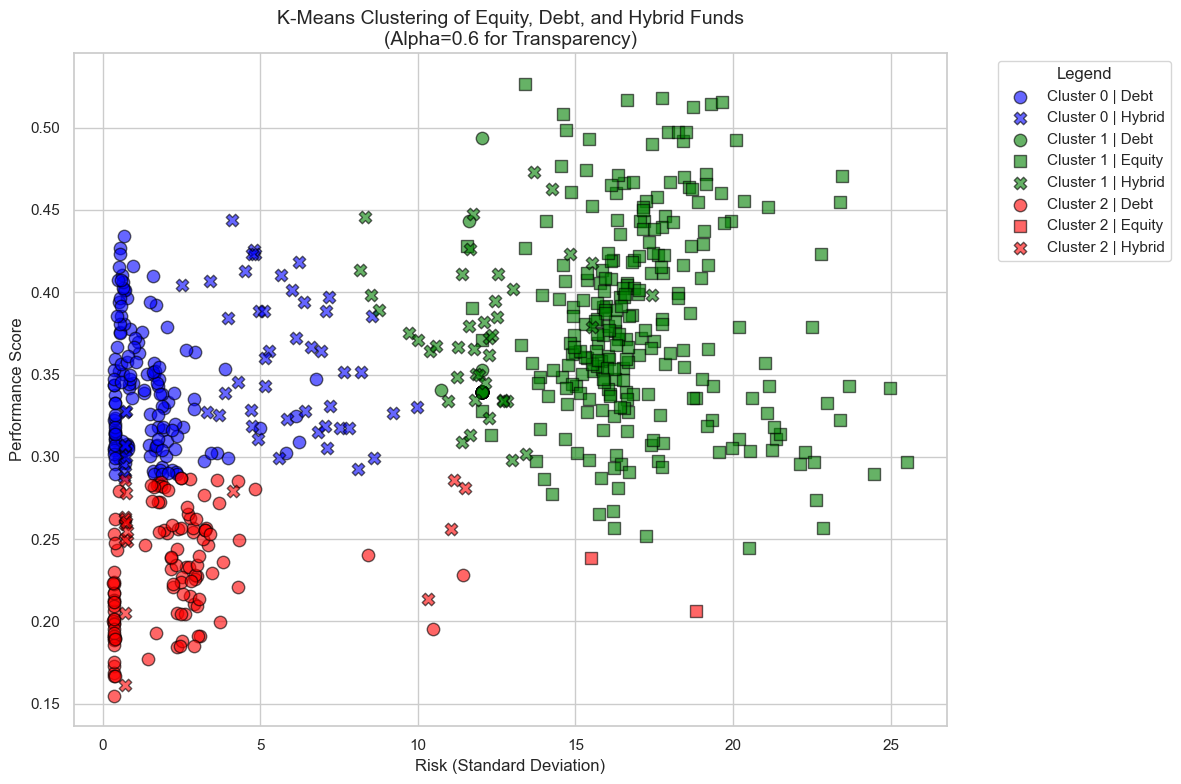

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Step 1: Filter Equity, Debt, Hybrid
core_funds_df = scaled_df[scaled_df['super_category'].isin(['Equity', 'Debt', 'Hybrid'])].copy()

# Step 2: Remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]

core_funds_df = remove_outliers_iqr(core_funds_df, 'sd_raw')
core_funds_df = remove_outliers_iqr(core_funds_df, 'score')

# Step 3: Scale for clustering
scaler = StandardScaler()
core_funds_df[['score_scaled', 'sd_scaled']] = scaler.fit_transform(core_funds_df[['score', 'sd_raw']])

# Step 4: KMeans Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
core_funds_df['cluster'] = kmeans.fit_predict(core_funds_df[['score_scaled', 'sd_scaled']])

# Step 5: Cluster colors and category shapes
cluster_color_map = {0: 'blue', 1: 'green', 2: 'red'}         # Cluster -> Color
category_marker_map = {'Debt': 'o', 'Equity': 's', 'Hybrid': 'X'}  # Category -> Shape

# Step 6: Plotting
plt.figure(figsize=(12, 8))
sns.set(style='whitegrid')

for cluster in sorted(core_funds_df['cluster'].unique()):
    for category in ['Debt', 'Equity', 'Hybrid']:
        subset = core_funds_df[(core_funds_df['cluster'] == cluster) & (core_funds_df['super_category'] == category)]
        if not subset.empty:
            plt.scatter(
                subset['sd_raw'],
                subset['score'],
                label=f"Cluster {cluster} | {category}",
                color=cluster_color_map[cluster],
                marker=category_marker_map[category],
                edgecolor='black',
                s=80,
                alpha=0.6
            )

# Labels and layout
plt.title("K-Means Clustering of Equity, Debt, and Hybrid Funds\n(Alpha=0.6 for Transparency)", fontsize=14)
plt.xlabel("Risk (Standard Deviation)")
plt.ylabel("Performance Score")
plt.legend(title="Legend", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
